<a href="https://colab.research.google.com/github/AdiDev1411/Machine-learning/blob/main/Gradient_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd


In [62]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [63]:
df = pd.DataFrame()

In [64]:
df['X'] = X.reshape(100)
df['y'] = y

In [65]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


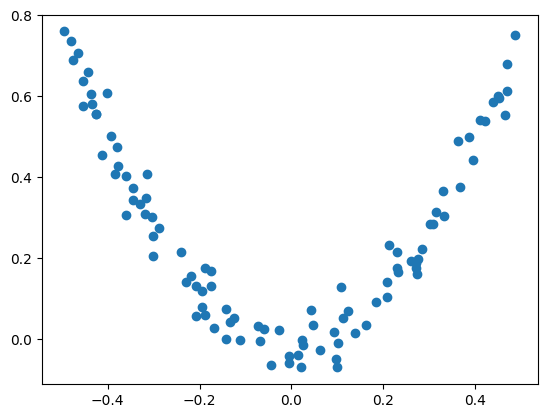

In [66]:
import matplotlib.pyplot as plt
plt.scatter(df['X'],df['y'])

In [67]:
df['pred1'] = df['y'].mean()
df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [68]:
df['res1'] = df['y'] - df['pred1']
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


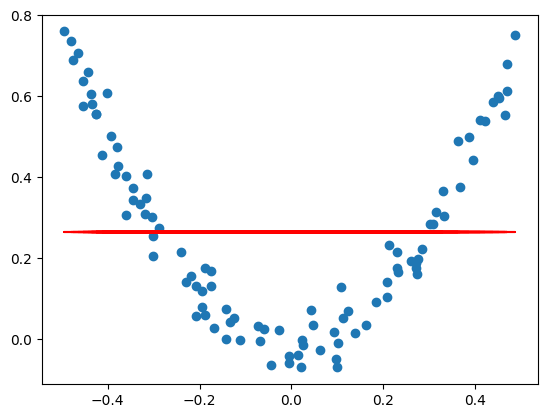

In [69]:
plt.scatter(X ,y)
plt.plot(df['X'],df['pred1'],c='red')

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
tree1 =  DecisionTreeRegressor(max_leaf_nodes=8)

In [72]:
tree1.fit(df['X'].values.reshape(100,1) , df['res1'].values)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,8
,min_impurity_decrease,0.0
,ccp_alpha,0.0


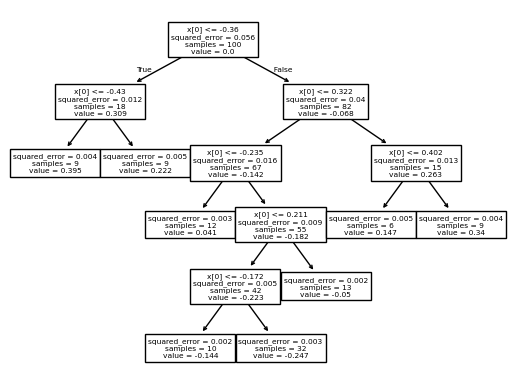

In [73]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [74]:
# generating X_test
X_test = np.linspace(-0.5, 0.5, 500)

In [75]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))

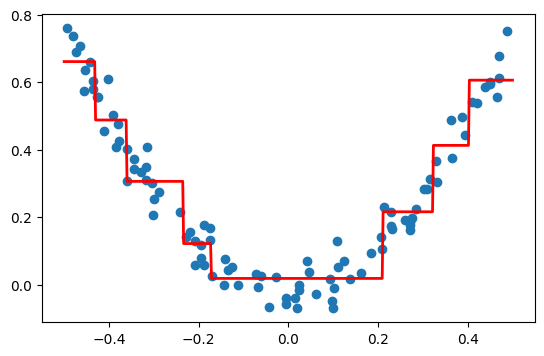

In [76]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])


In [77]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))
df

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [78]:
df['res2'] = df['y'] - df['pred2']

In [79]:
tree2  = DecisionTreeRegressor(max_leaf_nodes=8)

In [80]:
tree2.fit(df['X'].values.reshape(100,1) , df['res2'])

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,8
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [81]:
y_pred = 0.265458 + sum(reg.predict(X_test.reshape(-1,1)) for reg in [tree1,tree2])

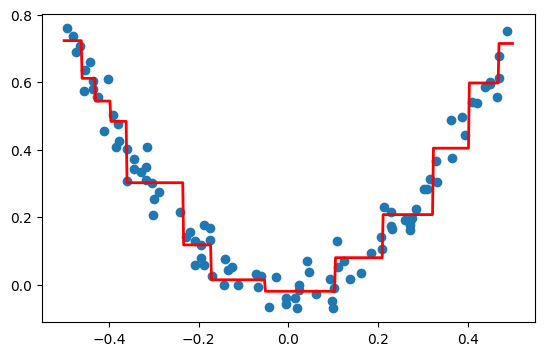

In [82]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test , y_pred , linewidth=2 , c='red')
plt.scatter(df['X'] , df['y'])